In [5]:
import pandas as pd
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
data=pd.read_csv(boston_url)

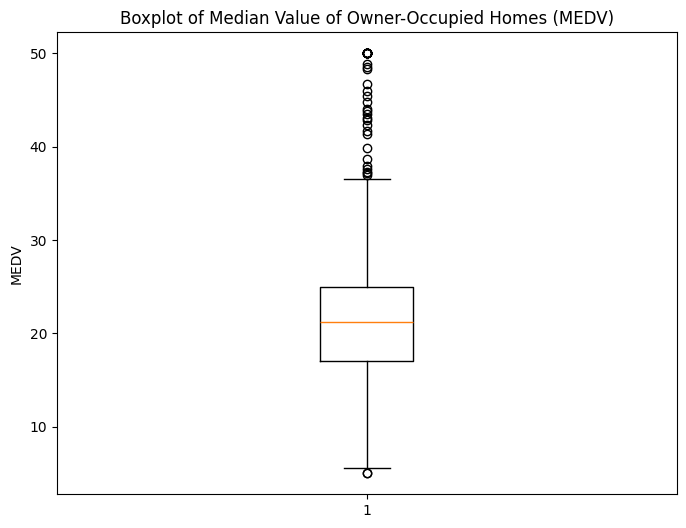

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame called 'data' with the relevant data
# For example: data = pd.read_csv('your_data.csv')

plt.figure(figsize=(8, 6))
plt.title("Boxplot of Median Value of Owner-Occupied Homes (MEDV)")
plt.boxplot(data['MEDV'])
plt.ylabel("MEDV")
plt.show()

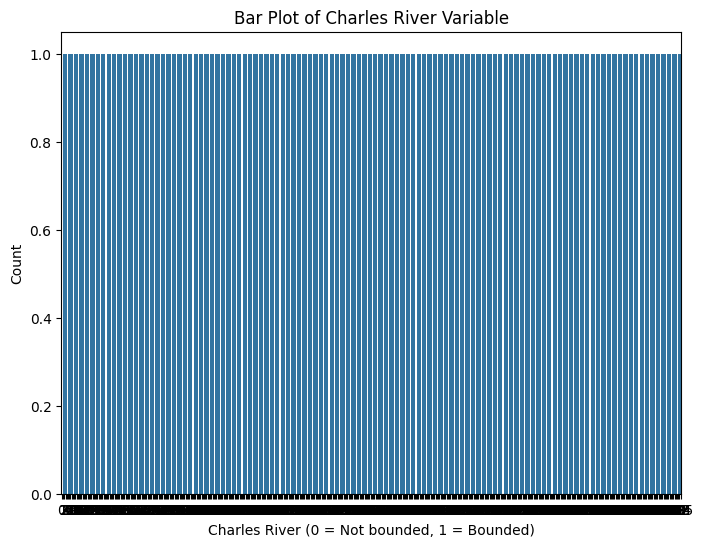

In [11]:
import seaborn as sns

plt.figure(figsize=(8, 6))
plt.title("Bar Plot of Charles River Variable")
sns.countplot(data['CHAS'])
plt.xlabel("Charles River (0 = Not bounded, 1 = Bounded)")
plt.ylabel("Count")
plt.show()


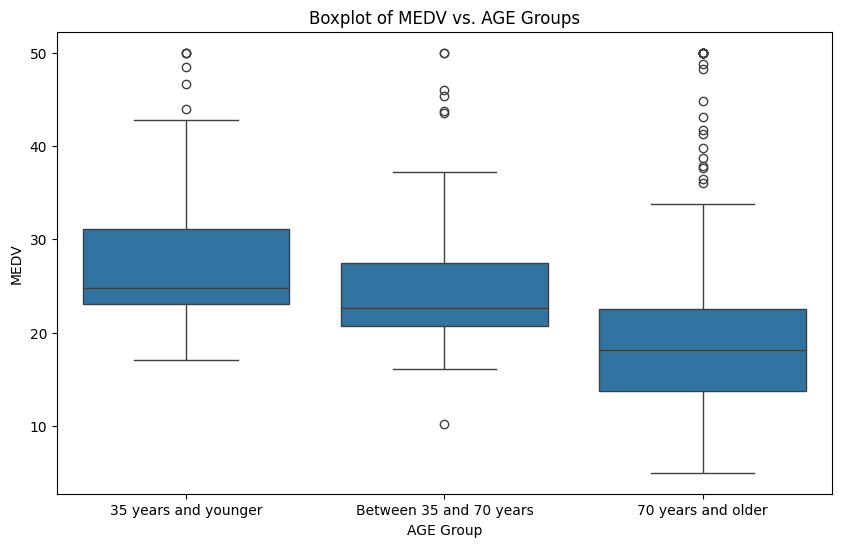

In [12]:
# Create AGE groups
bins = [0, 35, 70, max(data['AGE'])]
labels = ['35 years and younger', 'Between 35 and 70 years', '70 years and older']
data['AGE_Group'] = pd.cut(data['AGE'], bins=bins, labels=labels)

plt.figure(figsize=(10, 6))
plt.title("Boxplot of MEDV vs. AGE Groups")
sns.boxplot(x='AGE_Group', y='MEDV', data=data)
plt.xlabel("AGE Group")
plt.ylabel("MEDV")
plt.show()


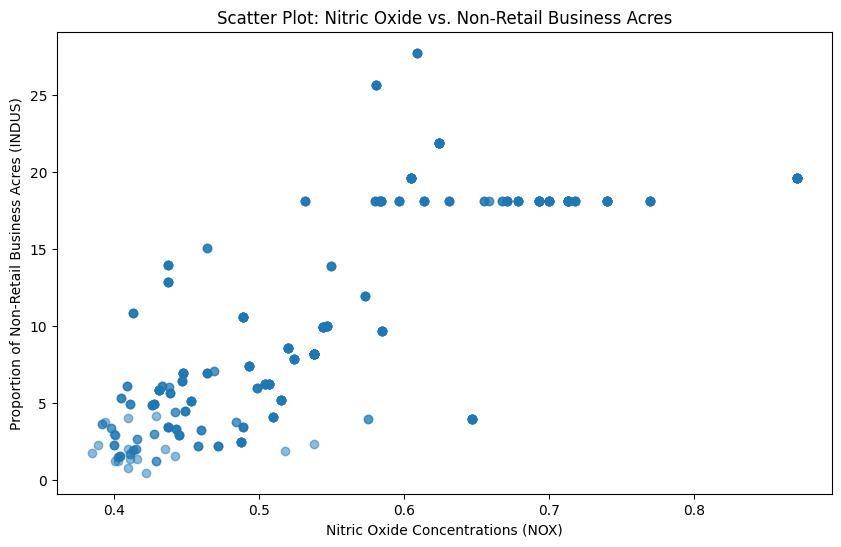

In [13]:
plt.figure(figsize=(10, 6))
plt.title("Scatter Plot: Nitric Oxide vs. Non-Retail Business Acres")
plt.scatter(data['NOX'], data['INDUS'], alpha=0.5)
plt.xlabel("Nitric Oxide Concentrations (NOX)")
plt.ylabel("Proportion of Non-Retail Business Acres (INDUS)")
plt.show()


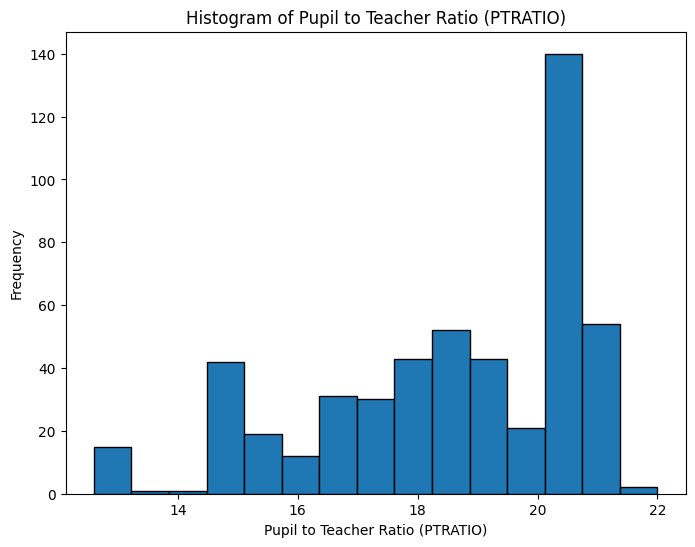

In [14]:
plt.figure(figsize=(8, 6))
plt.title("Histogram of Pupil to Teacher Ratio (PTRATIO)")
plt.hist(data['PTRATIO'], bins=15, edgecolor='k')
plt.xlabel("Pupil to Teacher Ratio (PTRATIO)")
plt.ylabel("Frequency")
plt.show()


In [6]:
## Tests 
from scipy import stats

# Data separation
river_bounded = data[data['CHAS'] == 1]['MEDV']
not_bounded = data[data['CHAS'] == 0]['MEDV']

# Perform the t-test
t_stat, p_value = stats.ttest_ind(river_bounded, not_bounded)

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in median values.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in median values.")


Reject the null hypothesis. There is a significant difference in median values.


In [15]:
from scipy import stats

# Define the age groups
labels = ['35 years and younger', 'Between 35 and 70 years', '70 years and older']

# Perform ANOVA
age_groups = [data[data['AGE_Group'] == group]['MEDV'] for group in labels]
f_stat, p_value = stats.f_oneway(*age_groups)

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in median values across age groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in median values across age groups.")


KeyError: 'AGE_Group'

In [8]:
# Calculate Pearson correlation
correlation, p_value = stats.pearsonr(data['NOX'], data['INDUS'])

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant relationship between NOX and INDUS.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between NOX and INDUS.")


Reject the null hypothesis. There is a significant relationship between NOX and INDUS.


In [14]:
import statsmodels.api as sm

X = data[['AdditionalDistance']]
X = sm.add_constant(X)  # Add a constant (intercept) term
y = data['MEDV']

model = sm.OLS(y, X).fit()

# Conclusion
if model.pvalues['AdditionalDistance'] < 0.05:
    print("Reject the null hypothesis. The additional weighted distance has a significant impact.")
else:
    print("Fail to reject the null hypothesis. The additional weighted distance does not have a significant impact.")


KeyError: "None of [Index(['AdditionalDistance'], dtype='object')] are in the [columns]"

,DIS
0,4.0900
1,4.9671
2,4.9671
3,6.0622
4,6.0622
...,...
501,2.4786
502,2.2875
503,2.1675
504,2.3889
